3.5 뉴스 기사 분류: 다중 분류 문제 Reuters

  - 실제 데이터에 대한 상세 기술 :
    "reuters": ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply', 
                'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
                'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
                'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
                'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']
  - 예측하고자 하는 방법/방향 기술 :
      뉴스를 46개의 상호 배타적인 토픽으로 분류(다중 분류),
  - 학습을 위해 데이터가 어떻게 가공/처리 되었는지 기술 :
      num_words=10000 매개변수는 데이터에서 가장 자주 등장하는 단어 1만개로 제한한다.
      데이터 셋을 텍스트로 인코딩한다. 레이블을 벡터로 변환시킨다.
  
  - 사용된 모델의 입력층과 출력층에 대한 기술 :
      46개의 클래스를 분류하기 위해 64개의 유닛을 가진 층을 사용한다.
      46보다 적은 유닛을 가진 층으로 모델을 구성하게 된다면 필요한 일부 정보를 누락하게되고 다음 층에서 복원할 방법이 없기때문이다.
      마지막 층은 46으로 46차원 벡터를 출력하게 된다. 모델의 마지막 softmax 활성화 함수를 사용하면 각 입력마다 확률분포를 출력하게 된다.
  

In [2]:
# 3-12 로이터 데이터셋 로드하기
from keras.datasets import reuters
import numpy as np

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
np.load = np_load_old

Using TensorFlow backend.


In [3]:
# 3-13 로이터 데이터 셋을 텍스트로 인코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(val, key) for (key, val) in word_index.items()])
decoded_news = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_news)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
# 3-14 데이터 인코딩하기
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 레이블 벡터 변환
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [5]:
# 3-15 모델 정희하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0730 02:08:17.775310   592 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 02:08:17.797766   592 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 02:08:17.797766   592 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
# 3-16 모델 컴파일하기
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0730 02:08:17.903020   592 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0730 02:08:17.930273   592 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [7]:
# 3-17 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
# 3-18 모델 훈련하기
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))



W0730 02:08:18.158323   592 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0730 02:08:18.311450   592 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 290us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 221us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 206us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 207us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 206us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 2s 203us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 204us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


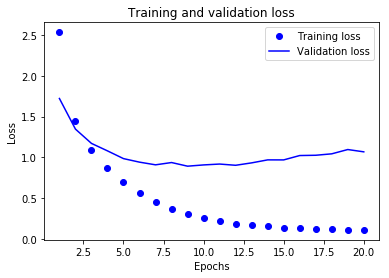

In [9]:
# 3-19 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

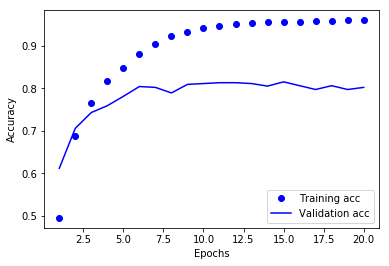

In [10]:
# 3-20 훈련과 검증 정확도 그리기
plt.clf() #그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc ,'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
# 3-21 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

result = model.evaluate(x_test, one_hot_test_labels)
print(result)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 283us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 2s 230us/step - loss: 1.3709 - acc: 0.7120 - val_loss: 1.2754 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 2s 234us/step - loss: 1.0132 - acc: 0.7793 - val_loss: 1.1296 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 2s 229us/step - loss: 0.7977 - acc: 0.8255 - val_loss: 1.0532 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 2s 213us/step - loss: 0.6394 - acc: 0.8629 - val_loss: 0.9744 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 2s 225us/step - loss: 0.5118 - acc: 0.8916 - val_loss: 0.9100 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 2s 234us/step - loss: 0.4115 - acc: 0.9148 - val_loss: 0.8908 - val_acc: 0.8210
Epoch 8

In [12]:
# 3-22 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)

print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.9999999
3


In [13]:
# 3-23 정보 병목이 있는 모델
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=128,
         validation_data=(x_val, y_val))

result = model.evaluate(x_test, one_hot_test_labels)
print(result)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 394us/step - loss: 3.1696 - acc: 0.2434 - val_loss: 2.6130 - val_acc: 0.2710
Epoch 2/20
7982/7982 [==============================] - 3s 317us/step - loss: 2.0591 - acc: 0.5467 - val_loss: 1.7007 - val_acc: 0.5870
Epoch 3/20
7982/7982 [==============================] - 3s 371us/step - loss: 1.5006 - acc: 0.6230 - val_loss: 1.5119 - val_acc: 0.6400
Epoch 4/20
7982/7982 [==============================] - 3s 344us/step - loss: 1.2892 - acc: 0.6907 - val_loss: 1.4125 - val_acc: 0.6780
Epoch 5/20
7982/7982 [==============================] - 3s 432us/step - loss: 1.1465 - acc: 0.7160 - val_loss: 1.3661 - val_acc: 0.6810
Epoch 6/20
7982/7982 [==============================] - 4s 471us/step - loss: 1.0414 - acc: 0.7310 - val_loss: 1.3441 - val_acc: 0.6980
Epoch 7/20
7982/7982 [==============================] - 4s 450us/step - loss: 0.9595 - acc: 0.7415 - val_loss: 1.3422 - val_acc: 0.7000
